# Análisis de Churn de Clientes - Telecom X - Parte 2
### Estudiante: Lic.Miguel Bareiro

##Extracción del Archivo Tratado en la Parte 1

In [11]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
datos_transformados = pd.read_csv('/content/datos_transformados_parte2.csv')
df = datos_transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [13]:
# Ver el resumen de tipos de datos
df = datos_transformados
print("\n Tipos de datos por columna:")
display(df.dtypes)


 Tipos de datos por columna:


,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [14]:
# Ver valores únicos por columna
print("Valores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

Valores únicos por columna:
customerID: 7043 valores únicos
Churn: 2 valores únicos
customer.gender: 2 valores únicos
customer.SeniorCitizen: 2 valores únicos
customer.Partner: 2 valores únicos
customer.Dependents: 2 valores únicos
customer.tenure: 73 valores únicos
phone.PhoneService: 2 valores únicos
phone.MultipleLines: 3 valores únicos
internet.InternetService: 3 valores únicos
internet.OnlineSecurity: 3 valores únicos
internet.OnlineBackup: 3 valores únicos
internet.DeviceProtection: 3 valores únicos
internet.TechSupport: 3 valores únicos
internet.StreamingTV: 3 valores únicos
internet.StreamingMovies: 3 valores únicos
account.Contract: 3 valores únicos
account.PaperlessBilling: 2 valores únicos
account.PaymentMethod: 4 valores únicos
Total.Day: 354 valores únicos
account.Charges.Monthly: 1585 valores únicos
account.Charges.Total: 6530 valores únicos


In [15]:
# Ver si hay valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [17]:
# Resumen estadístico de columnas numéricas
df.describe()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7032.000000,7043.000000,7032.000000
mean,0.162147,32.371149,2.159879,64.761692,2283.300441
std,0.368612,24.559481,1.006217,30.090047,2266.771362
min,0.000000,0.000000,0.460000,18.250000,18.800000
25%,0.000000,9.000000,1.207500,35.500000,401.450000
50%,0.000000,29.000000,2.350000,70.350000,1397.475000
75%,0.000000,55.000000,3.010000,89.850000,3794.737500
max,1.000000,72.000000,4.050000,118.750000,8684.800000


##Verificación de las columnas y del tipo de las Variantes.

In [18]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

##Preparación de los Datos

###Eliminando columnas irrelevantes

In [19]:
df = df.drop(columns=['customerID'])

In [20]:
df_clean = df.copy()

cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

###Transformando columnas categóricas a formato numérico

In [21]:
df_clean.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [22]:
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

In [23]:
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True, dtype=int)

df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,0,0,1,1,1,...,0,1,1,0,1,0,1,0,0,1
1,0,9,2.01,59.90,542.40,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,4,2.34,73.90,280.85,1,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,1,13,3.17,98.00,1237.85,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,0
4,1,3,2.97,83.90,267.40,1,0,1,0,1,...,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,22,2.84,85.10,1873.70,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7040,0,2,1.55,50.30,92.75,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7041,0,67,2.30,67.85,4627.65,0,1,1,1,1,...,1,1,0,1,0,1,0,0,0,1


In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   int64  
 6   customer.gender_Male                           7043 non-null   int64  
 7   customer.Partner_Yes                           7043 non-null   int64  
 8   customer.Dependents_Yes                        7043 non-null   int64  
 9   phone.PhoneService_Yes                         7043 

###Verificando y corrigiendo datos que estén nulos

In [25]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [26]:
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [27]:
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


##Correlación y Selección de Variables

###Mapas de calor

In [28]:
corr = df_encoded.corr()

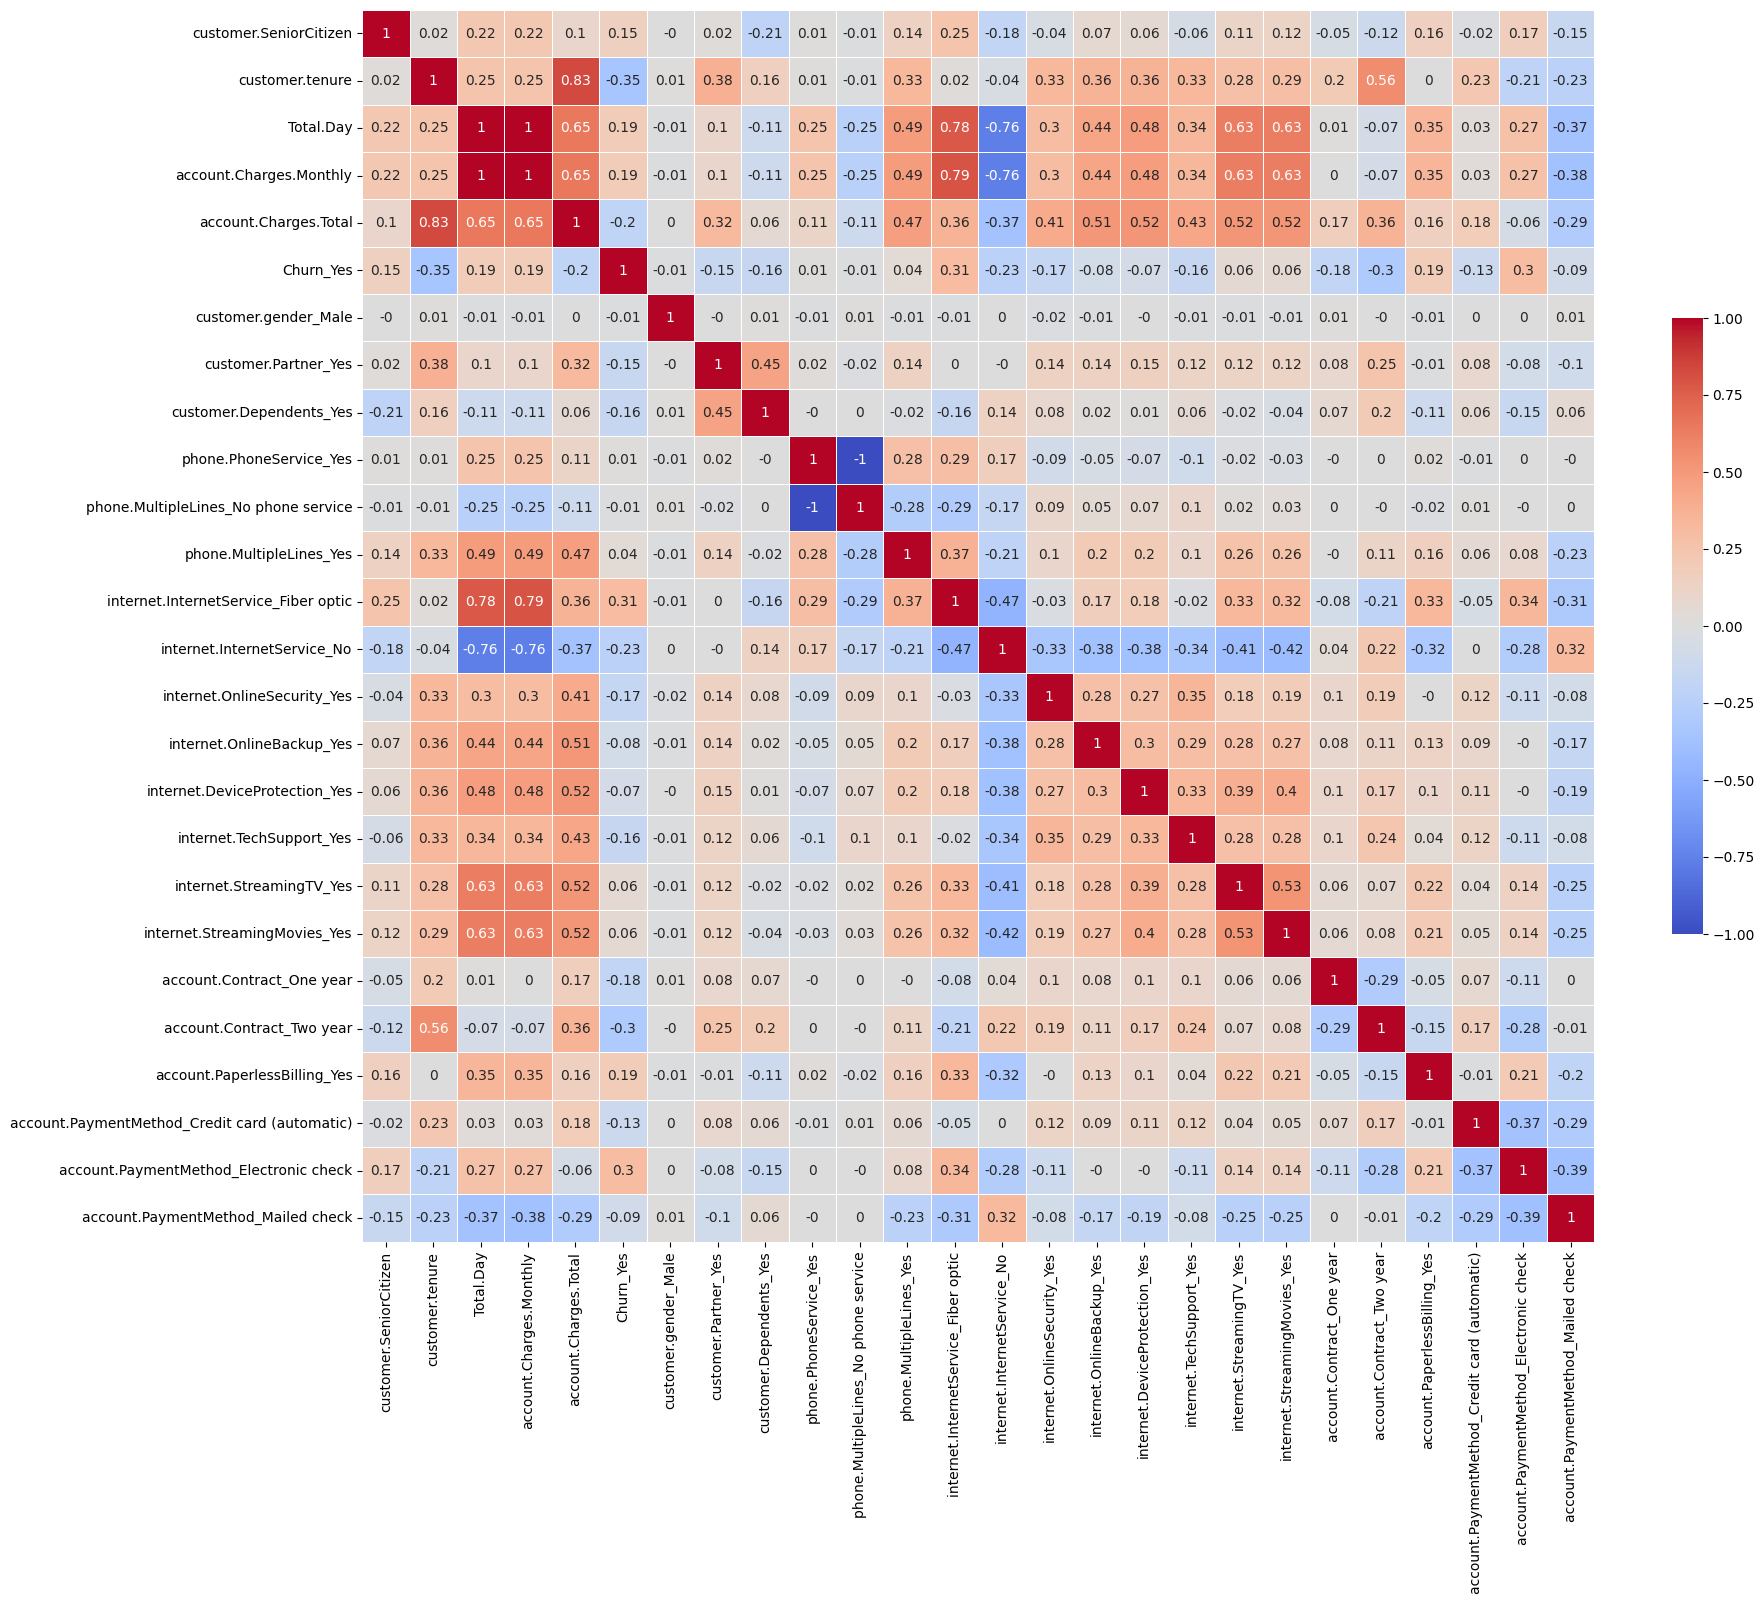

In [29]:
import numpy as np

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5},
                 cmap= 'coolwarm')
plt.show()

###Mapa de calor con correlación

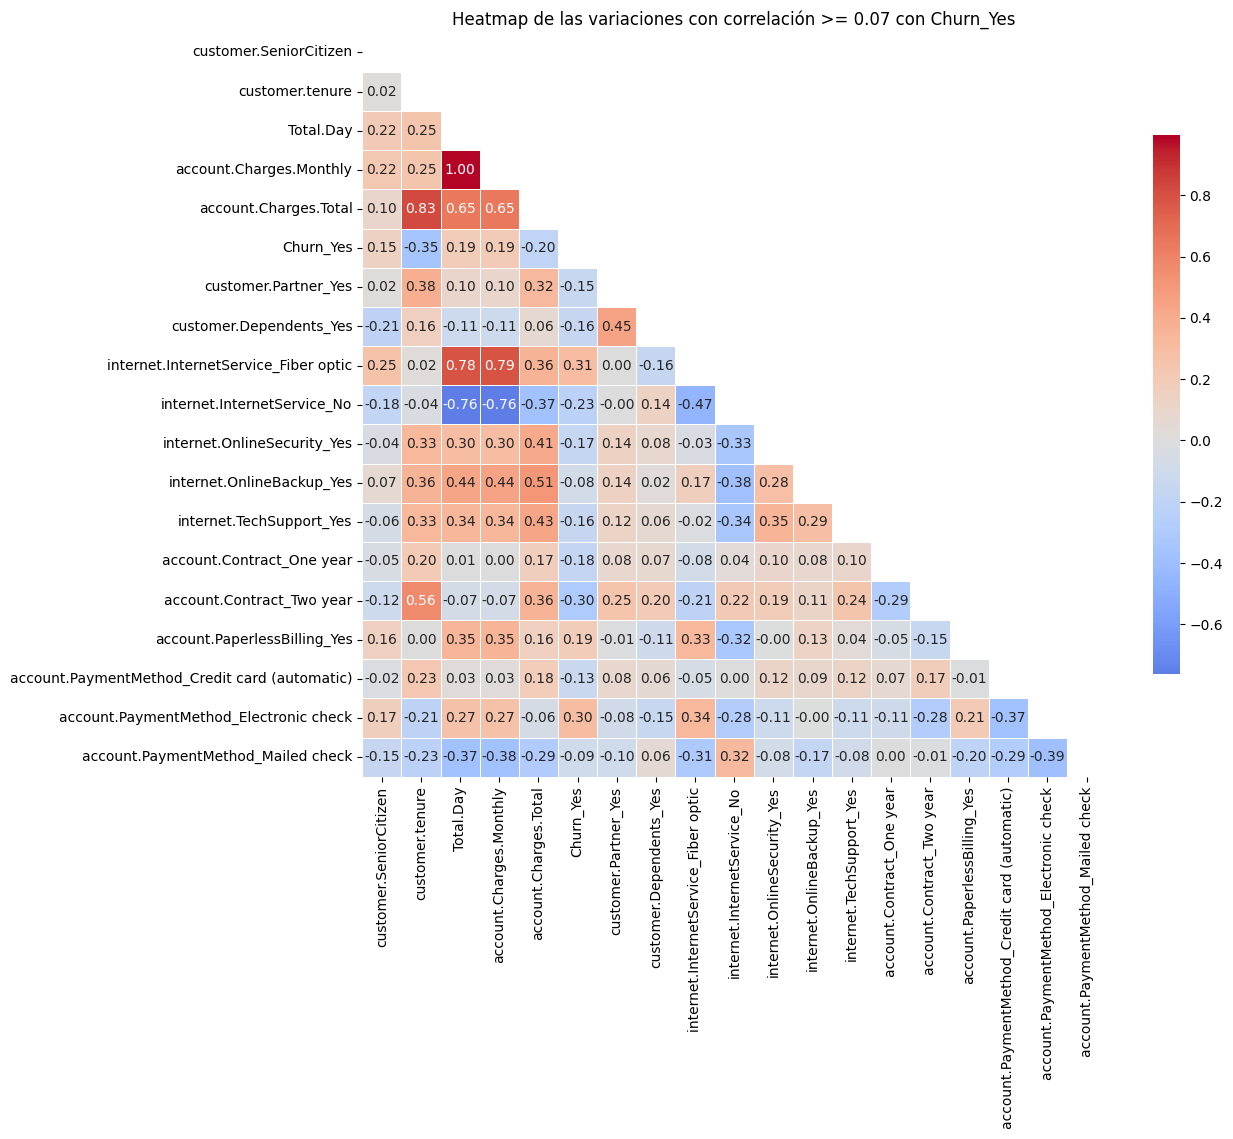

In [30]:
target_var = 'Churn_Yes'

limiar = 0.07

variables_relevantes = corr.index[abs(corr[target_var]) >= limiar]. tolist()

if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(corr_filtrada, annot=True, fmt=".2f",
            cmap= 'coolwarm', center=0, square=True,
            linewidths=.5,cbar_kws={"shrink": 0.7}, mask=mascara
)
plt.title(f'Heatmap de las variaciones con correlación >= {limiar} con {target_var}')
plt.show()

###Análisis de Multicolinealidad

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [32]:
X = df_encoded.drop(columns=['Churn_Yes'])

In [33]:
X_const = add_constant(X)

In [34]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


##VIF 1

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_filtered = X_const.copy()

cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]
X_filtered.drop(columns = cols_to_drop, inplace=True)

X_filtered.drop(columns = ["Total.Day"], inplace=True)

X_filtered.drop(columns = ["internet.InternetService_No"], inplace=True)

X_filtered = X_filtered.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


##VIF 2

In [36]:
X_final = X_filtered.drop(columns=["account.Charges.Total"])

vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


###Verificando la proporción de Clientes que cancelaron

In [37]:
proporcion_churn = df_encoded['Churn_Yes'].value_counts(normalize=True)

proporcion_churn

,proportion
Churn_Yes,
0,0.734215
1,0.265785


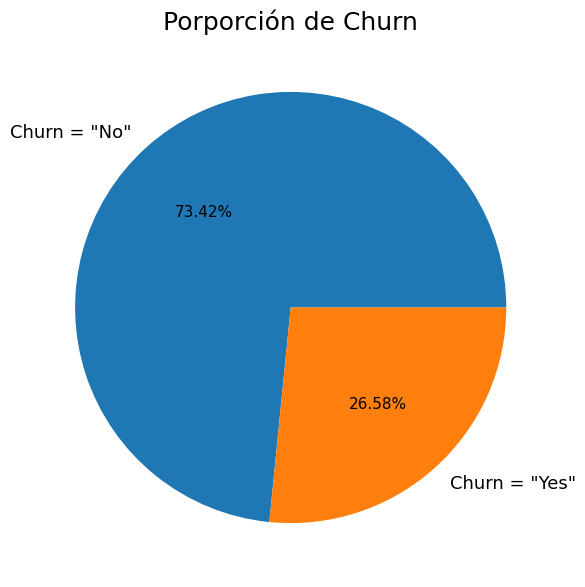

In [38]:
proporcion_churn = df_encoded['Churn_Yes'].value_counts(normalize=True).reset_index()

proporcion_churn.columns = ['Churn_Yes', 'proportion']

fig, ax = plt.subplots(figsize=(10,7))
wedges, texts, autotexts = ax.pie(data=proporcion_churn,
                                  x='proportion',
                                  autopct='%1.2f%%',
                                  labels=['Churn = "No"', 'Churn = "Yes"'],
                                  startangle=0
                                  )

for t in texts:
    t.set_fontsize(13)
for a in autotexts:
    a.set_fontsize(11)

plt.title('Porporción de Churn', fontsize=18)

plt.show()

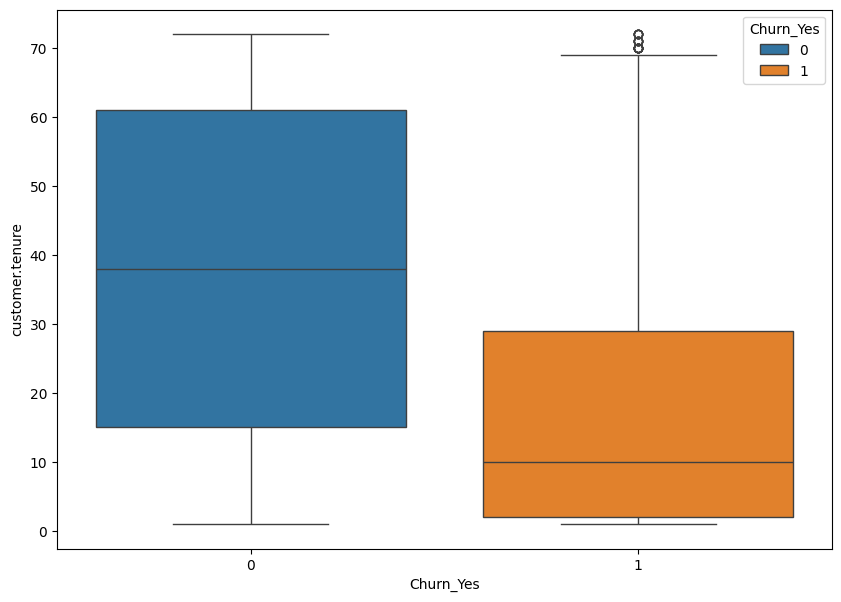

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(data=df_encoded, x='Churn_Yes',y= 'customer.tenure',hue='Churn_Yes')

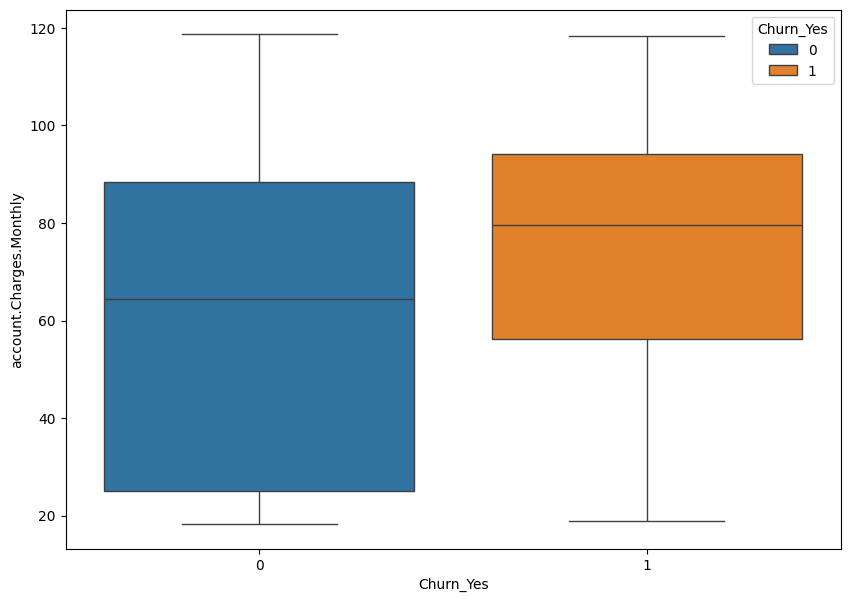

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(data=df_encoded, x='Churn_Yes',y= 'account.Charges.Monthly',hue='Churn_Yes')

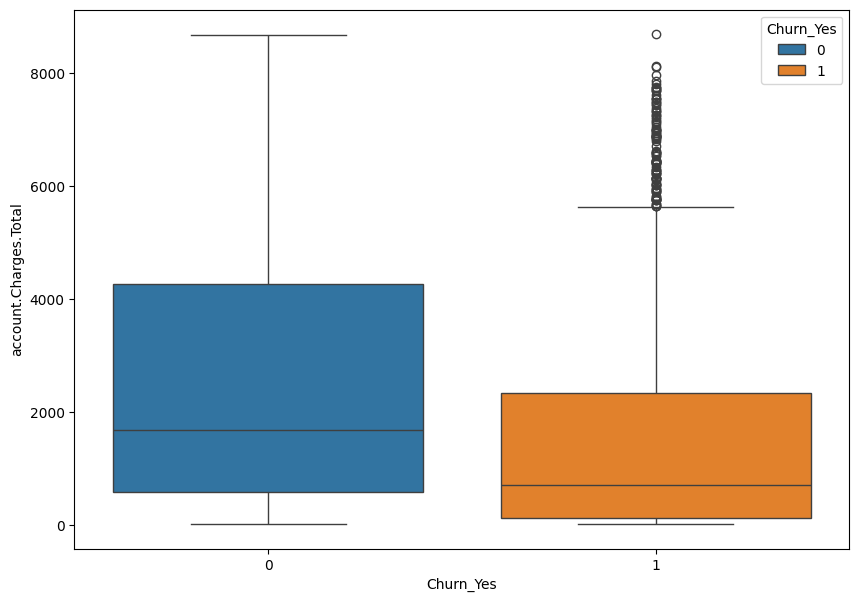

In [41]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(data=df_encoded, x='Churn_Yes',y= 'account.Charges.Total',hue='Churn_Yes')

##Modelos Predictivos

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

###Separando features y target

In [43]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

###Dividir entrenamiento, validación y prueba

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

###Normalizar

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Balancear entrenamiento con SMOTE

In [46]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [47]:
y_train_bal.value_counts()

,count
Churn_Yes,
1,3614
0,3614


###Análisis con Random Forest

In [48]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusión:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1549
           1       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



In [49]:
importancias = rf.feature_importances_
importancias_df = pd.DataFrame({'Feature': X.columns, 'Importancia': importancias})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)
importancias_df

,Feature,Importancia
1,customer.tenure,0.141730
4,account.Charges.Total,0.121221
3,account.Charges.Monthly,0.110457
2,Total.Day,0.106599
20,account.Contract_Two year,0.064828
23,account.PaymentMethod_Electronic check,0.056117
11,internet.InternetService_Fiber optic,0.048645
21,account.PaperlessBilling_Yes,0.034446
19,account.Contract_One year,0.033265
16,internet.TechSupport_Yes,0.031221


###Análisis con Regresión Logística

In [50]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [51]:
coeficientes = lr.coef_[0]
coeficientes_df = pd.DataFrame({'Feature': X.columns, 'Coeficientes': coeficientes})
coeficientes_df = coeficientes_df.sort_values(by='Coeficientes', ascending=False)
coeficientes_df

,Feature,Coeficientes
4,account.Charges.Total,0.903952
11,internet.InternetService_Fiber optic,0.748741
17,internet.StreamingTV_Yes,0.251362
18,internet.StreamingMovies_Yes,0.208032
23,account.PaymentMethod_Electronic check,0.201215
21,account.PaperlessBilling_Yes,0.188428
10,phone.MultipleLines_Yes,0.115392
15,internet.DeviceProtection_Yes,0.070145
0,customer.SeniorCitizen,0.065627
14,internet.OnlineBackup_Yes,0.029576


##Conclusiones

Luego de analizar los datos, llegamos a algunas conclusiones fundamentales de nuestro proyecto para predecir qué clientes tienen más probabilidad de cancelar sus servicios(Churns_Yes):

Armamos 2 modelos para que nos ayude a identificar qué clientes tienen una alta probabilidad de dejar nuestros servicios. Las causas más relevantes que encontramos son las siguientes:

Antiguedad(costumer.tenure): Los clientes que llevan más tiempo son más fieles, haciendo que sea poco probable que nos dejen. Por el contrario, los clientes que son más recientes son más propensos a cancelar nuestros servicios.

Cargos mensuales y totales(account.Charges.Monthly)(account.Charges.Total): Los clientes que suelen irse se concentran en un grupo con menor antigüedad y mayores cantidades de cargos. Por lo que esto da a entender que la percepción del valor en los servicios contratados suele influir.

Contratos (account.Contract): Se observa que los clientes que suelen irse están más asociados a aquellos con contratos de menor duración, como un contrato de mes a mes. Por lo que reforzar los contratos de mayor duración es un factor clave para evitar que más clientes se vayan.

Resumiendo lo visto anteriormente, este análisis nos muestra un problema con solución temprana y nos dice qué características de los clientes podemos centrarnos para tomar medidas y evitar que se vayan. Estamos listos para iniciar campañas de retención dirigidas usando esta lista de clientes en riesgo de cancelación.

A partir de los factores identificados, se proponen las siguientes estrategias para reducir la cancelación:

**Contratos y Antigüedad**

Ofrecer incentivos para migrar de contratos mensuales a anuales (descuentos, beneficios exclusivos).
Implementar programas de fidelización para clientes nuevos durante los primeros 6 meses.

**Cargos Mensuales**

Revisar la estructura de precios para clientes con cargos elevados.
Ofrecer paquetes personalizados según el uso y necesidades del cliente.

**Servicios de Seguridad y Soporte**

Promover activamente servicios como OnlineSecurity y TechSupport, que correlacionan con menor cancelación.
Mejorar la experiencia de soporte técnico para aumentar la percepción de valor.

**Métodos de Pago**

Incentivar métodos de pago automáticos o anuales para reducir fricción y aumentar retención.

##Recomendaciones Finales

Incorporar modelos como LightGBM o CatBoost para mejorar eficiencia y precisión.

Usar técnicas como SHAP para explicar modelos complejos a stakeholders.

Implementar dashboards interactivos que muestren métricas de churn y variables clave en tiempo real.